In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


Import all the Dataset

In [2]:
cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer_id = pd.read_csv("Customer_ID.csv")
transaction_id = pd.read_csv("Transaction_ID.csv")

Check the first 5 rows of the dataframe

In [3]:
cab.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [4]:
city.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [5]:
customer_id.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [6]:
transaction_id.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

Check some details about the dataset.

In [7]:
def data_details(df):

    print("The total rows is :", df.shape[0])
    print("Total numbers of variables is: ", df.shape[1])

    print("----------"*10)

    print("The dataset columns are listed below: ")
    print(df.columns)

    print("----------"*10)

    print("The data type of each columns are: ")
    print(df.dtypes)

    print("----------"*10)
    print("The Missing rows in each columns are: \n")
    missing_number = df.isnull().sum()
    print(missing_number[missing_number > 0])

In [8]:
data_details(cab)

The total rows is : 359392
Total numbers of variables is:  7
----------------------------------------------------------------------------------------------------
The dataset columns are listed below: 
Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')
----------------------------------------------------------------------------------------------------
The data type of each columns are: 
Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object
----------------------------------------------------------------------------------------------------
The Missing rows in each columns are: 

Series([], dtype: int64)


In [9]:
data_details(city)

The total rows is : 20
Total numbers of variables is:  3
----------------------------------------------------------------------------------------------------
The dataset columns are listed below: 
Index(['City', 'Population', 'Users'], dtype='object')
----------------------------------------------------------------------------------------------------
The data type of each columns are: 
City          object
Population    object
Users         object
dtype: object
----------------------------------------------------------------------------------------------------
The Missing rows in each columns are: 

Series([], dtype: int64)


We need to change the population and user from objects to integer.

In [126]:
city['Population'] = [x.replace(',', '') for x in city['Population']]
city["Population"] = city["Population"].astype(int)


city['Users'] = [x.replace(',','') for x in city['Users']]
city["Users"] = city["Users"].astype(int)

In [127]:
data_details(city)


The total rows is : 20
Total numbers of variables is:  3
----------------------------------------------------------------------------------------------------
The dataset columns are listed below: 
Index(['City', 'Population', 'Users'], dtype='object')
----------------------------------------------------------------------------------------------------
The data type of each columns are: 
City          object
Population     int32
Users          int32
dtype: object
----------------------------------------------------------------------------------------------------
The Missing rows in each columns are: 

Series([], dtype: int64)


In [10]:
data_details(customer_id)

The total rows is : 49171
Total numbers of variables is:  4
----------------------------------------------------------------------------------------------------
The dataset columns are listed below: 
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')
----------------------------------------------------------------------------------------------------
The data type of each columns are: 
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object
----------------------------------------------------------------------------------------------------
The Missing rows in each columns are: 

Series([], dtype: int64)


In [11]:
data_details(transaction_id)

The total rows is : 440098
Total numbers of variables is:  3
----------------------------------------------------------------------------------------------------
The dataset columns are listed below: 
Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')
----------------------------------------------------------------------------------------------------
The data type of each columns are: 
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object
----------------------------------------------------------------------------------------------------
The Missing rows in each columns are: 

Series([], dtype: int64)


Join all the dataframe together.

In [128]:
df = pd.merge(transaction_id, cab).merge(customer_id).merge(city)
df.head()

Transaction ID  Customer ID Payment_Mode Date of Travel     Company  \
0        10000011        29290         Card     2016-01-08    Pink Cab   
1        10351127        29290         Cash     2018-07-21  Yellow Cab   
2        10412921        29290         Card     2018-11-23  Yellow Cab   
3        10000012        27703         Card     2016-01-06    Pink Cab   
4        10320494        27703         Card     2018-04-21  Yellow Cab   

         City  KM Travelled  Price Charged  Cost of Trip Gender  Age  \
0  ATLANTA GA         30.45         370.95      313.6350   Male   28   
1  ATLANTA GA         26.19         598.70      317.4228   Male   28   
2  ATLANTA GA         42.55         792.05      597.4020   Male   28   
3  ATLANTA GA         28.62         358.52      334.8540   Male   27   
4  ATLANTA GA         36.38         721.10      467.1192   Male   27   

   Income (USD/Month)  Population  Users  
0               10813      814885  24701  
1               10813      814885  24701  
2               10813      814885  24701  
3                9237      814885  24701  
4                9237      814885  24701

Change the Date to DateTime

In [129]:
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"])

Create a seperate column for Year, Month and Day

In [130]:
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day

In [131]:
df.head()

Transaction ID  Customer ID Payment_Mode Date of Travel     Company  \
0        10000011        29290         Card     2016-01-08    Pink Cab   
1        10351127        29290         Cash     2018-07-21  Yellow Cab   
2        10412921        29290         Card     2018-11-23  Yellow Cab   
3        10000012        27703         Card     2016-01-06    Pink Cab   
4        10320494        27703         Card     2018-04-21  Yellow Cab   

         City  KM Travelled  Price Charged  Cost of Trip Gender  Age  \
0  ATLANTA GA         30.45         370.95      313.6350   Male   28   
1  ATLANTA GA         26.19         598.70      317.4228   Male   28   
2  ATLANTA GA         42.55         792.05      597.4020   Male   28   
3  ATLANTA GA         28.62         358.52      334.8540   Male   27   
4  ATLANTA GA         36.38         721.10      467.1192   Male   27   

   Income (USD/Month)  Population  Users  Year  Month  Day  
0               10813      814885  24701  2016      1    8  
1               10813      814885  24701  2018      7   21  
2               10813      814885  24701  2018     11   23  
3                9237      814885  24701  2016      1    6  
4                9237      814885  24701  2018      4   21

Make a Pairplot for the dataset

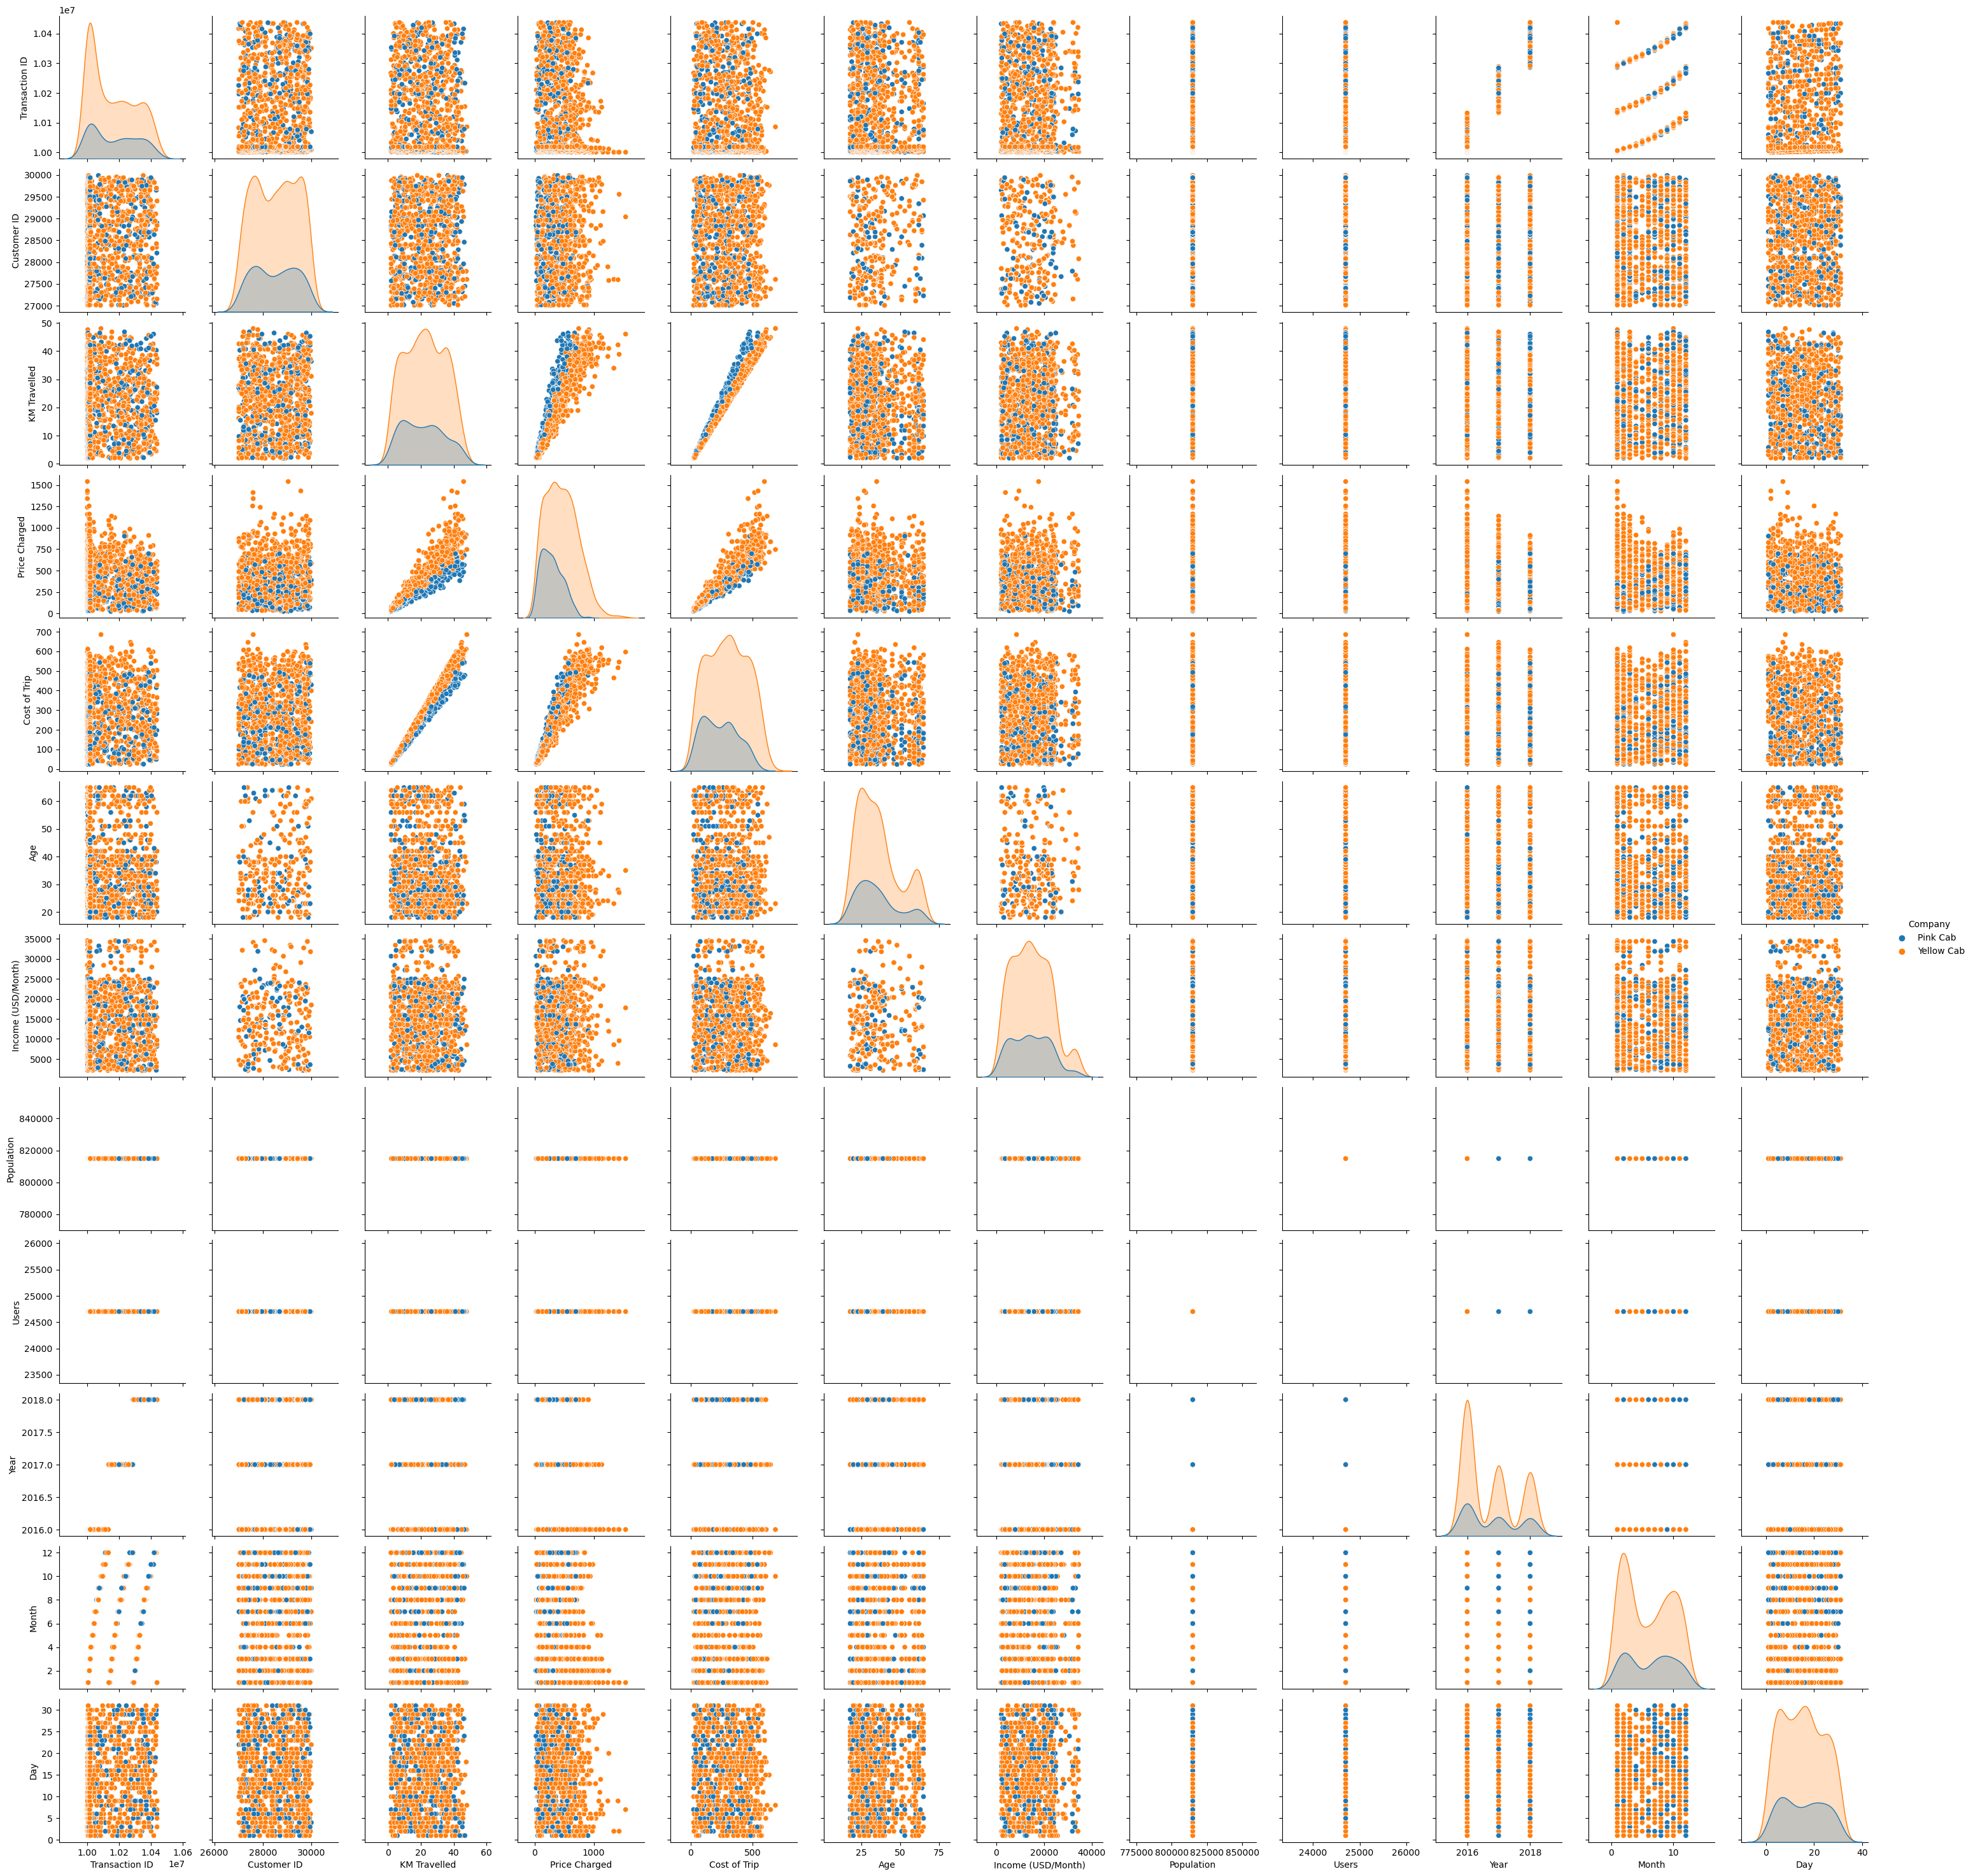

In [132]:
sns.pairplot(df.head(1000), hue='Company')

Create the profit column

In [133]:
df["profit"] = df["Price Charged"] - df["Cost of Trip"]
df.head()

Transaction ID  Customer ID Payment_Mode Date of Travel     Company  \
0        10000011        29290         Card     2016-01-08    Pink Cab   
1        10351127        29290         Cash     2018-07-21  Yellow Cab   
2        10412921        29290         Card     2018-11-23  Yellow Cab   
3        10000012        27703         Card     2016-01-06    Pink Cab   
4        10320494        27703         Card     2018-04-21  Yellow Cab   

         City  KM Travelled  Price Charged  Cost of Trip Gender  Age  \
0  ATLANTA GA         30.45         370.95      313.6350   Male   28   
1  ATLANTA GA         26.19         598.70      317.4228   Male   28   
2  ATLANTA GA         42.55         792.05      597.4020   Male   28   
3  ATLANTA GA         28.62         358.52      334.8540   Male   27   
4  ATLANTA GA         36.38         721.10      467.1192   Male   27   

   Income (USD/Month)  Population  Users  Year  Month  Day    profit  
0               10813      814885  24701  2016      1    8   57.3150  
1               10813      814885  24701  2018      7   21  281.2772  
2               10813      814885  24701  2018     11   23  194.6480  
3                9237      814885  24701  2016      1    6   23.6660  
4                9237      814885  24701  2018      4   21  253.9808

The new dataframe details

In [134]:
data_details(df)

The total rows is : 359392
Total numbers of variables is:  18
----------------------------------------------------------------------------------------------------
The dataset columns are listed below: 
Index(['Transaction ID', 'Customer ID', 'Payment_Mode', 'Date of Travel',
       'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Year',
       'Month', 'Day', 'profit'],
      dtype='object')
----------------------------------------------------------------------------------------------------
The data type of each columns are: 
Transaction ID                 int64
Customer ID                    int64
Payment_Mode                  object
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Gender                        object
Age      

Number of Pink and Yellow Cab

In [135]:
pink_cab_len = (df["Company"]=="Pink Cab").sum()
yellow_cab_len = (df["Company"]=="Yellow Cab").sum()
pink_cab_len, yellow_cab_len

(84711, 274681)

Total Profit for the differnt cab

In [29]:
pink_cab_profit = df["profit"][df["Company"]=="Pink Cab"].sum()
yellow_cab_profit = df["profit"][df["Company"]=="Yellow Cab"].sum()
pink_cab_profit, yellow_cab_profit

(5307328.321, 44020373.17080002)

Total Profit per Ride

In [31]:
pink_ride_per_profit = pink_cab_profit / pink_cab_len
yellow_cab_per_profit = yellow_cab_profit / yellow_cab_len
pink_ride_per_profit, yellow_cab_per_profit

(62.65217410961977, 160.25998584103021)

Putting all into one Dataframe

In [33]:
profit_company = pd.DataFrame({
    "Company" : ["Pink Cab", "Yellow Cab"],
    "Profit" : [pink_cab_profit, yellow_cab_profit],
    "Total Rides" : [pink_cab_len, yellow_cab_len],
    "Profit Per Ride" : [pink_ride_per_profit, yellow_cab_per_profit]
})

profit_company

Company        Profit  Total Rides  Profit Per Ride
0    Pink Cab  5.307328e+06        84711        62.652174
1  Yellow Cab  4.402037e+07       274681       160.259986

Check if there is correlation between the dependent variable and the target

In [136]:
correlation = df.corr()
correlation

C:\Users\Sanus\AppData\Local\Temp\ipykernel_39636\3035769115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Transaction ID  Customer ID  KM Travelled  Price Charged  \
Transaction ID            1.000000    -0.016912     -0.001429      -0.052902   
Customer ID              -0.016912     1.000000      0.000389      -0.177324   
KM Travelled             -0.001429     0.000389      1.000000       0.835753   
Price Charged            -0.052902    -0.177324      0.835753       1.000000   
Cost of Trip             -0.003462     0.003077      0.981848       0.859812   
Age                      -0.001267    -0.004735     -0.000369      -0.003084   
Income (USD/Month)       -0.001570    -0.013608     -0.000544       0.003228   
Population                0.023868    -0.647052     -0.002311       0.326589   
Users                     0.013526    -0.610742     -0.000428       0.281061   
Year                      0.941600    -0.002539     -0.001072      -0.036409   
Month                     0.287009    -0.044656     -0.001903      -0.061116   
Day                       0.012021     0.000650      0.001652      -0.004021   
profit                   -0.087130    -0.306527      0.462768       0.864154   

                    Cost of Trip       Age  Income (USD/Month)  Population  \
Transaction ID         -0.003462 -0.001267           -0.001570    0.023868   
Customer ID             0.003077 -0.004735           -0.013608   -0.647052   
KM Travelled            0.981848 -0.000369           -0.000544   -0.002311   
Price Charged           0.859812 -0.003084            0.003228    0.326589   
Cost of Trip            1.000000 -0.000189           -0.000633    0.015108   
Age                    -0.000189  1.000000            0.003907   -0.009002   
Income (USD/Month)     -0.000633  0.003907            1.000000    0.011868   
Population              0.015108 -0.009002            0.011868    1.000000   
Users                   0.023628 -0.005906            0.010464    0.915490   
Year                   -0.001773 -0.000579           -0.001617    0.000003   
Month                  -0.008370 -0.002226            0.000322    0.064571   
Day                     0.002091 -0.001275            0.001860    0.000970   
profit                  0.486056 -0.005093            0.006148    0.544079   

                       Users      Year     Month       Day    profit  
Transaction ID      0.013526  0.941600  0.287009  0.012021 -0.087130  
Customer ID        -0.610742 -0.002539 -0.044656  0.000650 -0.306527  
KM Travelled       -0.000428 -0.001072 -0.001903  0.001652  0.462768  
Price Charged       0.281061 -0.036409 -0.061116 -0.004021  0.864154  
Cost of Trip        0.023628 -0.001773 -0.008370  0.002091  0.486056  
Age                -0.005906 -0.000579 -0.002226 -0.001275 -0.005093  
Income (USD/Month)  0.010464 -0.001617  0.000322  0.001860  0.006148  
Population          0.915490  0.000003  0.064571  0.000970  0.544079  
Users               1.000000 -0.000771  0.036558  0.000514  0.457758  
Year               -0.000771  1.000000 -0.030490 -0.020995 -0.060567  
Month               0.036558 -0.030490  1.000000  0.041412 -0.096352  
Day                 0.000514 -0.020995  0.041412  1.000000 -0.008942  
profit              0.457758 -0.060567 -0.096352 -0.008942  1.000000

Plot the heatmap to visualize the correlation

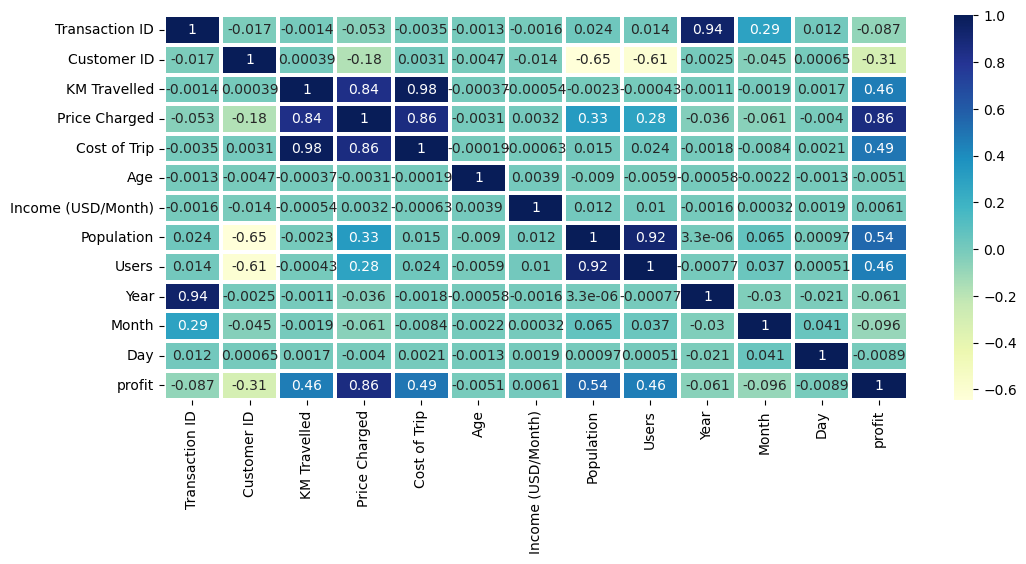

In [137]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.heatmap(correlation, cmap = "YlGnBu", annot=True, linewidth=1.5, ax = ax)
plt.savefig("./images/heatmap.png")

Frequency distribution showing the relationship between the city and the car company.

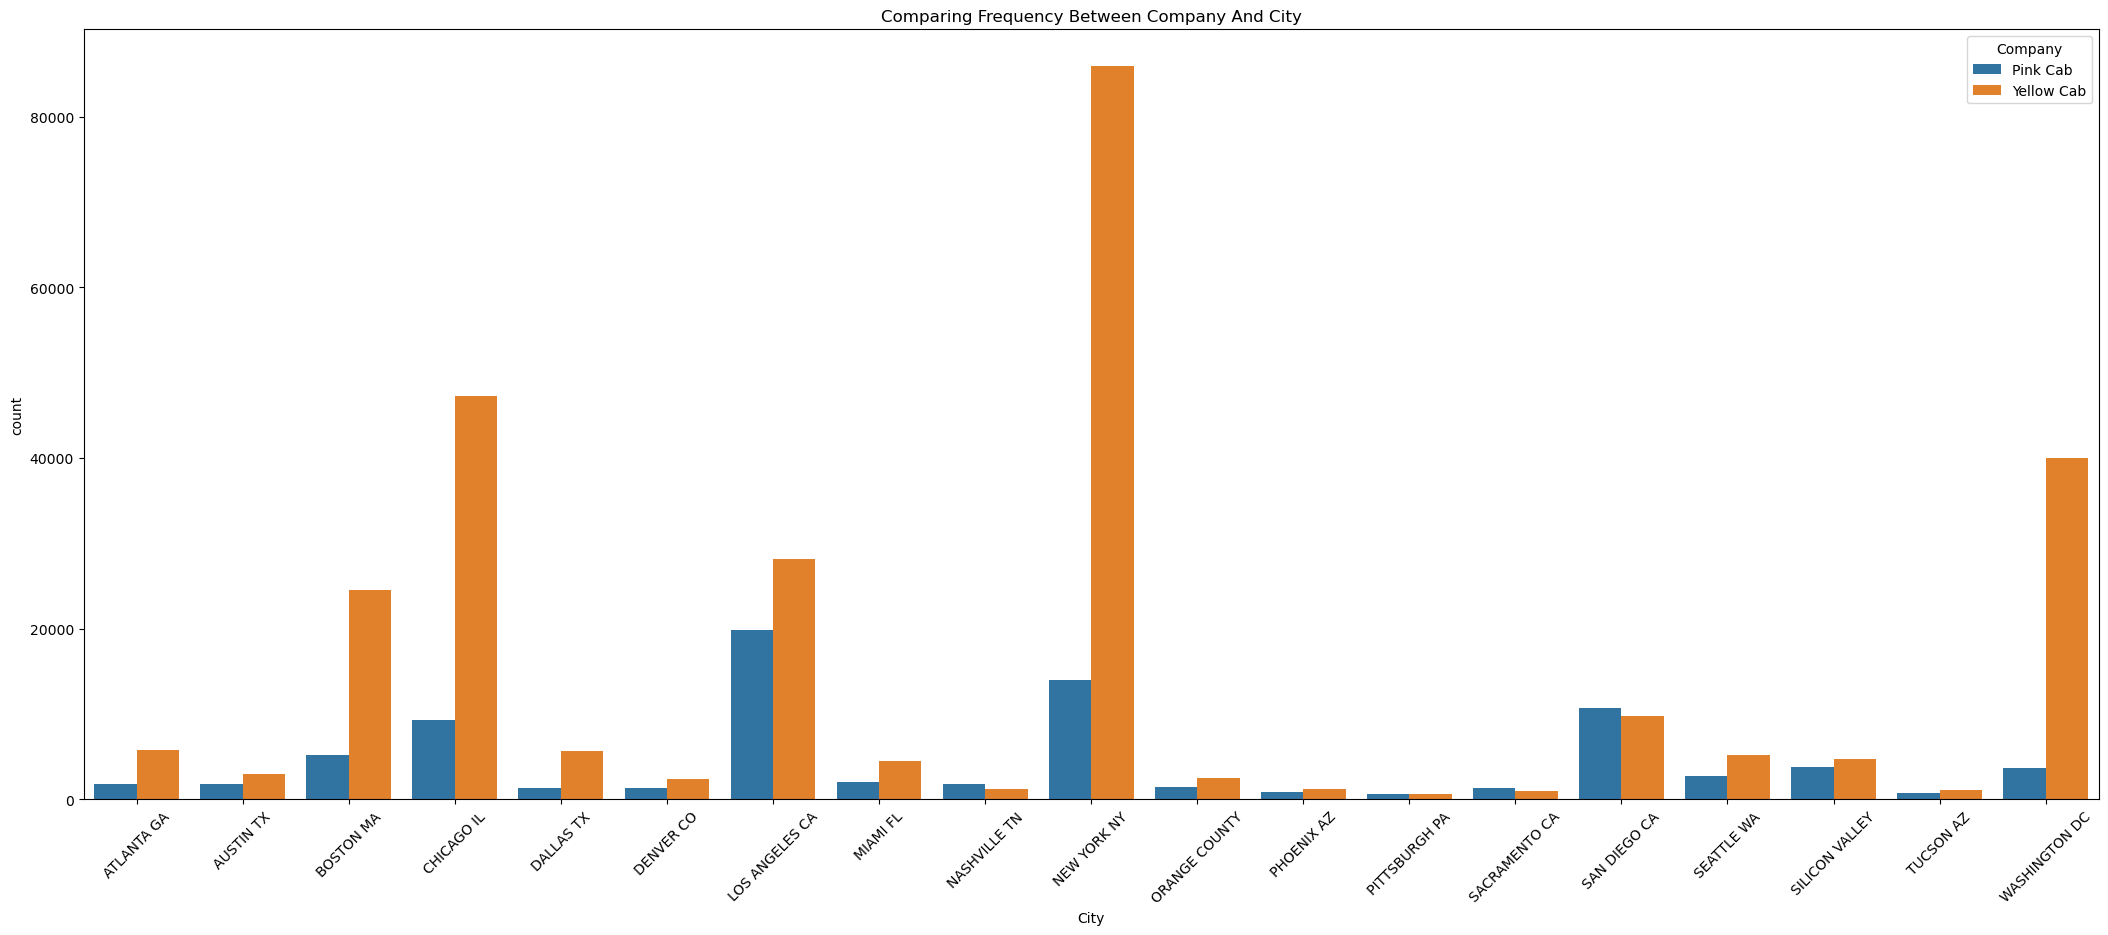

In [63]:
plt.figure(figsize=(26, 10))
sns.countplot(x="City", hue="Company", data=df)
plt.xticks(rotation=45)
plt.title('Comparing Frequency Between Company And City')
plt.savefig("./images/city_company_image.png")


Frequency distribution showing the relationship between the Gender and the car company.

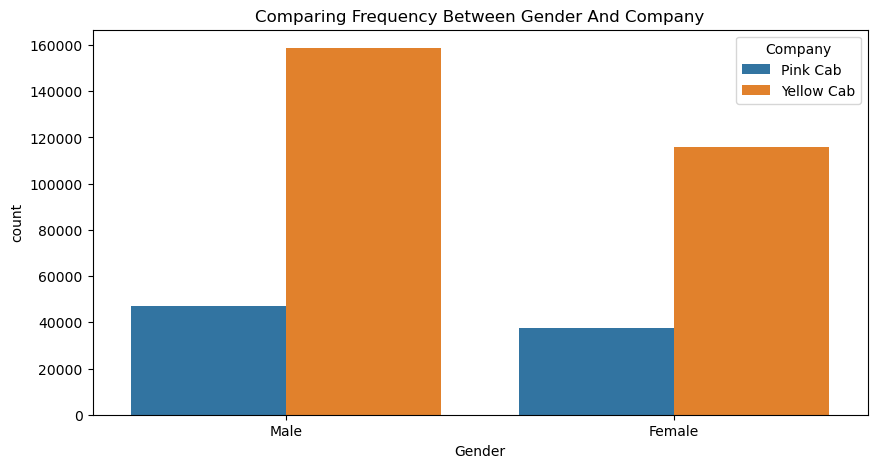

In [64]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Gender", hue="Company", data=df)
plt.title('Comparing Frequency Between Gender And Company')
plt.savefig("./images/gender_car_image.png")

Frequency distribution showing the relationship between the year of travel and the car company.

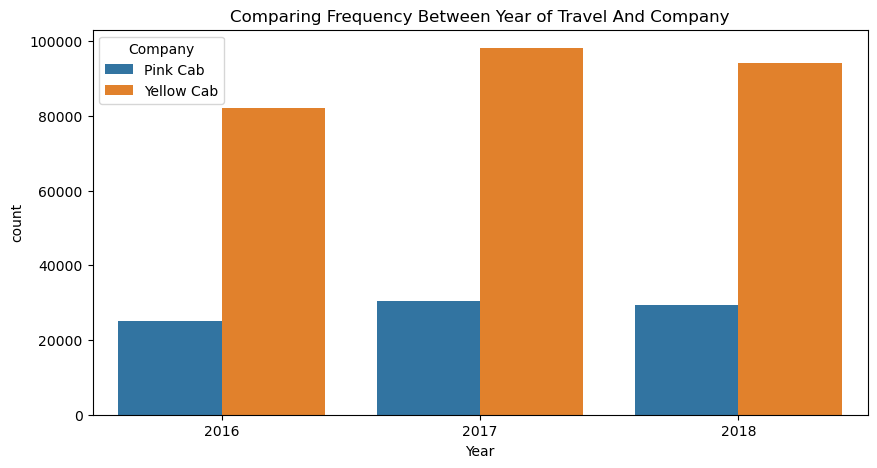

In [65]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Year", hue="Company", data=df)
plt.title('Comparing Frequency Between Year of Travel And Company')
plt.savefig("./images/year_car_image.png")

Frequency distribution showing the relationship between the payment methods and the car company.

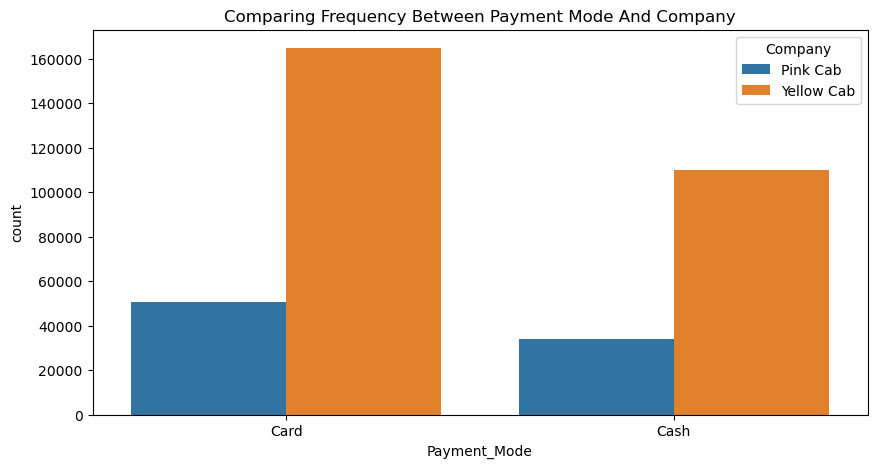

In [66]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Payment_Mode", hue="Company", data=df)
plt.title('Comparing Frequency Between Payment Mode And Company')
plt.savefig("payment_car_image.png")


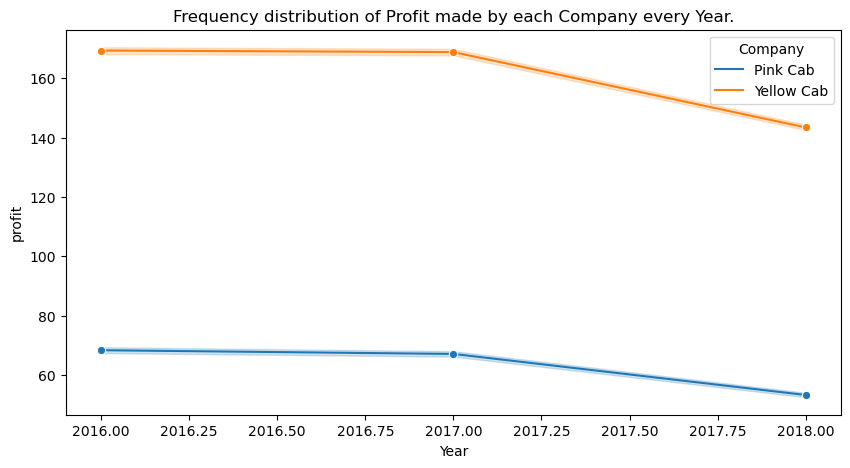

In [164]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y = "profit", hue = "Company", data=df,  marker='o')
plt.title('Frequency distribution of Profit made by each Company every Year.')
plt.savefig("./images/profit_yearly_image.png")


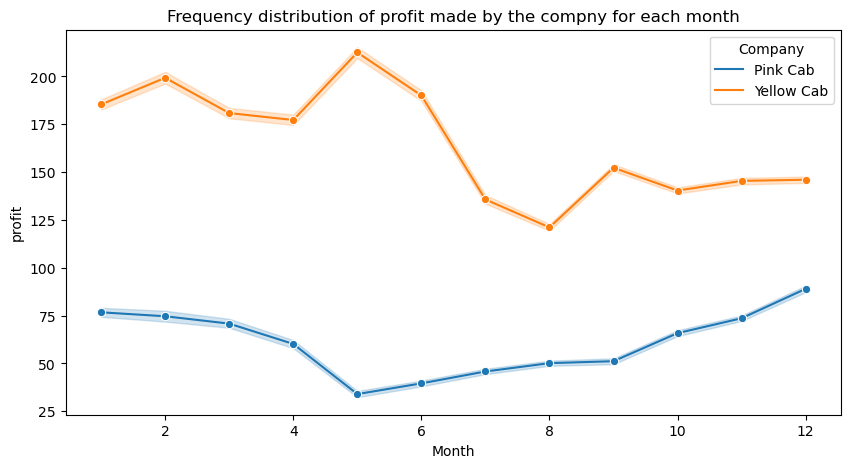

In [70]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="profit", hue="Company",
             data=df,  marker='o')
plt.title('Frequency distribution of profit made by the compny for each month')
plt.savefig("./images/profit_monthly_image.png")


##  Hypothesis Testing

In [138]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode', 'Date of Travel',
       'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Year',
       'Month', 'Day', 'profit'],
      dtype='object')

In [268]:
df["Income (USD/Month)"].describe()


count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64

        Hypothesis 1: 
        
        Is there difference in profit made by cab company regarding the payment method

        H0: There is no difference in profit made by cab company regarding the payment method.

        H1: There is difference in profit made by cab company regarding the payment method.

In [245]:
method1 = df["profit"][df["Payment_Mode"]=='Card'].to_numpy()
method2 = df["profit"][df["Payment_Mode"]=='Cash'].to_numpy()

In [247]:
# Perform the independent samples t-test
from scipy.stats import ttest_ind


t, p = ttest_ind(method1, method2)

# Print the results
print("t-statistic:", t)
print("p-value:", p)

t-statistic: -0.7630743349931721
p-value: 0.4454195660215944


    Decision Rule:

    * Reject H0 if p_value < 0.05 or alpha level.

    * Since the p-value is greater than 0.05 we accept the null hypothesis and conclude that there is no difference in the profit made by pink cab regarding the payment method in the cab companies.

    Hypothesis 2: 

    Is there difference in profit made regarding the Gender

    H0: There is no difference in profit made by cab company regarding the Gender in the cab companies.

    H1: There is difference in profit made by cab comapny regarding the Gender in the cab companies.

In [252]:
method3 = df["profit"][df["Gender"] == "Male"].to_numpy()
method4 = df["profit"][df["Gender"] == "Female"].to_numpy()

In [253]:
t, p = ttest_ind(method3, method4)

# Print the results
print("t-statistic:", t)
print("p-value:", p)

t-statistic: 12.70131593950141
p-value: 5.921884821314785e-37


    Decision Rule:

    * Reject H0 if p_value < 0.05 or alpha level.

    * Since the p-value is less than 0.05 we reject the null hypothesis and conclude that there is difference in the profit made regarding the gender in the cab companies.

    Hypothesis 3: 

    Is there difference in profit regarding the cost of the trip

    H0: There is no difference in profit made by cab company regarding the cost of the trip.

    H1: There is difference in profit made by cab company regarding the cost of the trip.

In [266]:
method5 = df["profit"][df["Cost of Trip"] < df["Cost of Trip"].mean()].to_numpy()
method6 = df["profit"][df["Cost of Trip"] >= df["Cost of Trip"].mean()].to_numpy()

In [267]:
t, p = ttest_ind(method5, method6)

# Print the results
print("t-statistic:", t)
print("p-value:", p)

t-statistic: -272.85843110649853
p-value: 0.0


    Decision Rule:

    * Reject H0 if p_value < 0.05 or alpha level.

    * Since the p-value is less than 0.05 we reject the null hypothesis and conclude that there is difference in the profit made by the car company regarding the cost of the trip.

    Hypothesis 4: 

    Is there difference in profit regarding the Monthly Income

    H0: There is no difference in profit made by cab company regarding the Monthly Income.

    H1: There is difference in profit made by cab company regarding the Monthly Income.

In [273]:
method7 = df["profit"][df["Income (USD/Month)"] < df["Income (USD/Month)"].mean()].to_numpy()
method8 = df["profit"][df["Income (USD/Month)"]
                       >= df["Income (USD/Month)"].mean()].to_numpy()

In [274]:
t, p = ttest_ind(method7, method8)

# Print the results
print("t-statistic:", t)
print("p-value:", p)


t-statistic: -6.266080220260764
p-value: 3.706669201803861e-10


    Decision Rule:

    * Reject H0 if p_value < 0.05 or alpha level.

    * Since the p-value is less than 0.05 we reject the null hypothesis and conclude that there is difference in the profit made by the car company regarding the Monthly Income.

    Hypothesis 5: 

    Is there difference in profit regarding the Price Charged.

    H0: There is no difference in profit made by cab company regarding the Price Charged.

    H1: There is difference in profit made by cab company regarding the Price Charged.

In [277]:
method9 = df["profit"][df["Price Charged"] < df["Price Charged"].mean()].to_numpy()
method10 = df["profit"][df["Price Charged"]
                       >= df["Price Charged"].mean()].to_numpy()

In [278]:
t, p = ttest_ind(method9, method10)

# Print the results
print("t-statistic:", t)
print("p-value:", p)


t-statistic: -451.267563543643
p-value: 0.0


    Decision Rule:

    * Reject H0 if p_value < 0.05 or alpha level.

    * Since the p-value is less than 0.05 we reject the null hypothesis and conclude that there is difference in the profit made by the car company regarding the Price Charged..